In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import imageio.v2 as imageio

In [141]:
np.random.seed(2)

def image2pix(file):
    #read image
    img = imageio.imread(file)
    img = img/255
    img_shape = img.shape
    pixels = img.reshape(-1, img.shape[2])
    return img_shape, pixels

def kmeans(pixels, img_shape, k):
    
    # randomly select pixels to form clusters
    centroids = pixels[np.random.choice(len(pixels), k, replace=False)]
    

    max_iterations = 200
    iterations = 0
    
    for i in range(max_iterations):
        updated_centroids = np.empty((k, pixels.shape[1]))
        
        # using l2 norm to find the distance
        distances = np.linalg.norm(pixels[:, np.newaxis, :] - centroids, axis=2)

        # get the index for the minimum distance
        indx = np.argmin(distances, axis=1)

        # update centroids with the closest pixels
        for j in range(k):
            update_pixels = pixels[indx == j]
            updated_centroids[j] = np.mean(update_pixels, axis=0)
        
        # check for convergence
        if np.linalg.norm(updated_centroids - centroids) < 0.00001:
            break
        
        centroids = updated_centroids
        iterations += 1
        
    #recreate the compressed image
    cluster = centroids[indx, :]
    new_img = np.reshape(cluster, img_shape)
    
    return new_img, iterations
    


In [142]:
def image(clusters, f):
    img = imageio.imread(f)
    plt.figure(figsize=(36, 10))
    plt.subplot(1, len(clusters) + 1, 1)
    plt.imshow(img)
    plt.show()
    print("Starting Image")

    for i, k in enumerate(clusters):
        start = time.time()
        img_shape, pixels = image2pix(f)
        new_img, iterations = kmeans(pixels,img_shape, k)
        plt.figure(figsize=(36, 10))
        plt.subplot(1, len(clusters) + 1, i + 1)
        plt.imshow(new_img)
        plt.show()
        
        end = time.time()
        print("Run time:", end-start)
        print("k =", k)
        print("Iterations =", iterations)
    return    


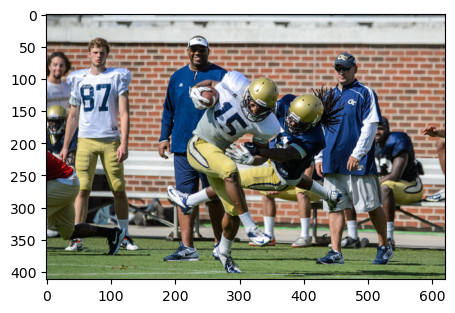

Starting Image


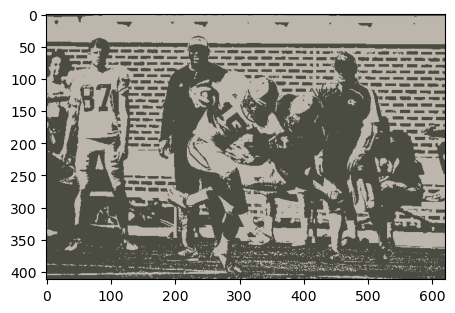

Run time: 0.9526278972625732
k = 2
Iterations = 16


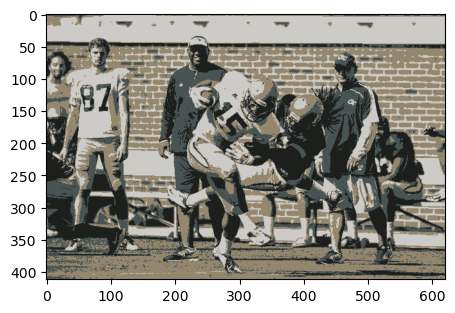

Run time: 3.4245219230651855
k = 4
Iterations = 52


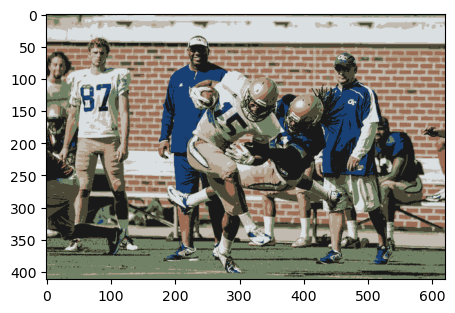

Run time: 5.927335977554321
k = 8
Iterations = 55


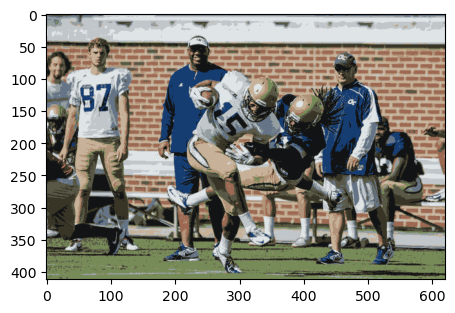

Run time: 24.01438593864441
k = 12
Iterations = 159


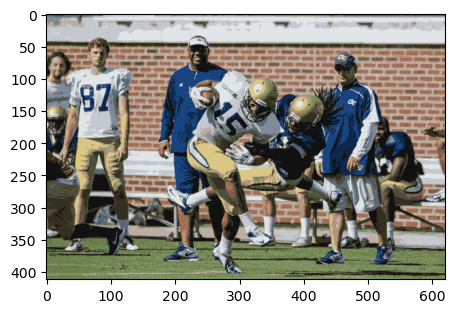

Run time: 24.701567888259888
k = 16
Iterations = 134


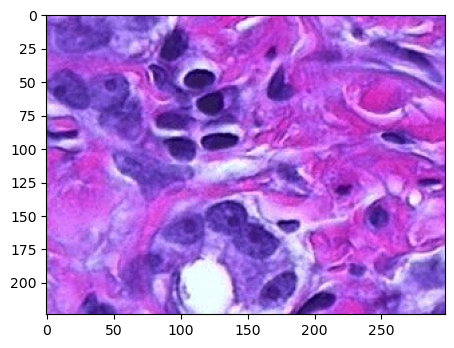

Starting Image


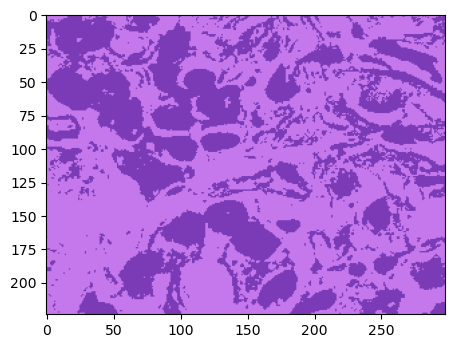

Run time: 0.3773519992828369
k = 2
Iterations = 26


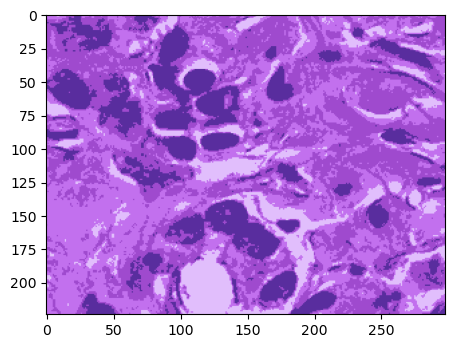

Run time: 0.7380750179290771
k = 4
Iterations = 42


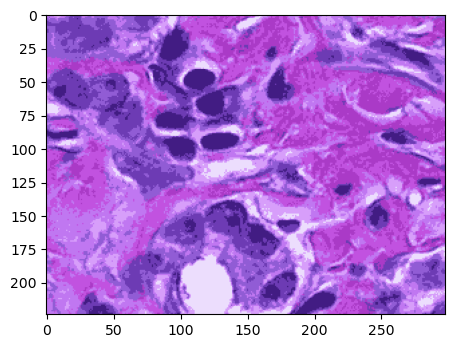

Run time: 1.607118844985962
k = 8
Iterations = 57


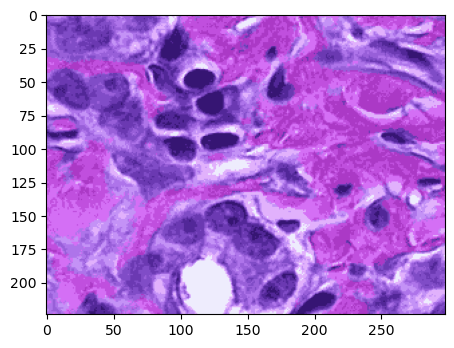

Run time: 2.056425094604492
k = 12
Iterations = 51


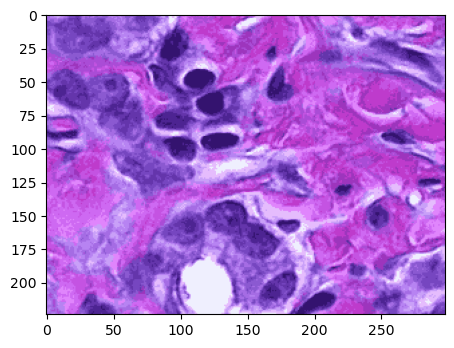

Run time: 5.831842660903931
k = 16
Iterations = 119


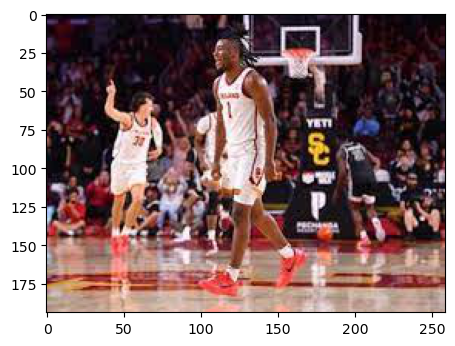

Starting Image


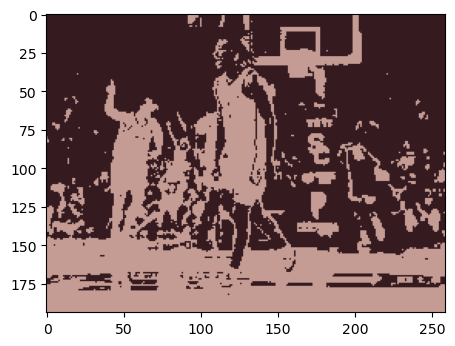

Run time: 0.29012489318847656
k = 2
Iterations = 16


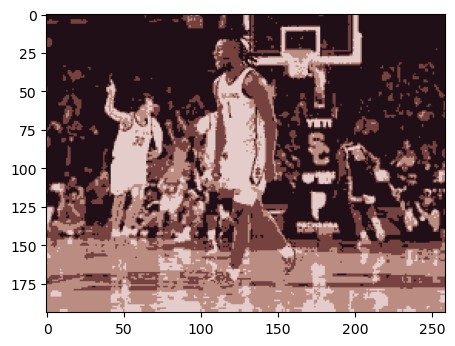

Run time: 0.4723498821258545
k = 4
Iterations = 31


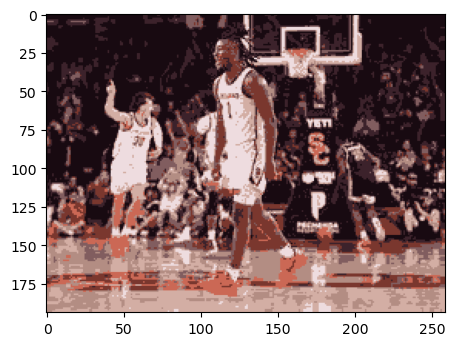

Run time: 1.874823808670044
k = 8
Iterations = 94


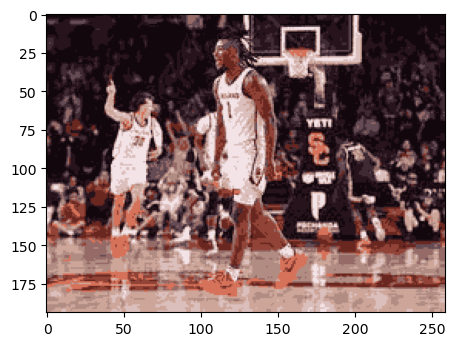

Run time: 4.902047872543335
k = 12
Iterations = 175


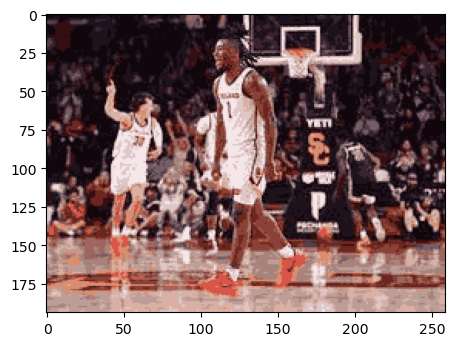

Run time: 4.844647169113159
k = 16
Iterations = 123


In [144]:
clusters = [2, 4, 8, 12, 16]
files = ['data/football.bmp','data/hestain.bmp','data/basketball.bmp']

for f in files:
    image(clusters, f)